In [1]:
from analytics_utils.autocorrelation import autocorrelation
from analytics_utils.describe_data import describe_data
from analytics_utils.interpolate import interpolate
from analytics_utils.correlate import correlate
from analytics_utils.decompose import decompose
from statsmodels.tsa.stattools import adfuller
from analytics_utils.roll import roll
from analytics_utils.ewm import ewm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Perform Dickey-Fuller test:
def dftest(df):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [3]:
# Load dataset
# df = pd.read_csv('temp/bear_log.csv', parse_dates={'datetime': ['date', 'time']}, index_col='datetime').iloc[:1000,2:]
df = pd.read_csv('temp/repsol.csv', parse_dates=['data'], index_col='data')[:1000]

In [4]:
# Show the values of bear
display(df)

,ZE-1231181AA,ZE-1231182AA,ZE-1231181BA,ZE-1231182BA,TE-1231197A,TE-1231201A,VE-1231186XA,VE-1231188XA,VE-1231186YA,VE-1231188YA,...,TE-1231198A,TE-1231202A,VE-1231187XA,VE-1231189XA,VE-1231187YA,VE-1231189YA,TE-1231199A,TE-1231203A,TE-1231200A,TE-1231204A
data,,,,,,,,,,,,,,,,,,,,,
2018-06-20 13:53:58,1332.0,NaN,1417.0,NaN,1310.0,NaN,290.0,NaN,523.0,NaN,...,1412.0,NaN,NaN,NaN,900.0,NaN,NaN,NaN,NaN,NaN
2018-06-20 13:54:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-20 13:54:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1214.0,NaN,795.0,...,NaN,NaN,819.0,424.0,NaN,433.0,NaN,NaN,NaN,NaN
2018-06-20 13:54:13,1324.0,1477.0,1412.0,1438.0,NaN,NaN,294.0,NaN,535.0,NaN,...,1392.0,NaN,NaN,NaN,884.0,NaN,NaN,NaN,NaN,NaN
2018-06-20 13:54:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-20 13:54:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1214.0,NaN,NaN,...,NaN,NaN,814.0,425.0,NaN,440.0,NaN,NaN,NaN,NaN
2018-06-20 13:54:28,1319.0,1485.0,1406.0,1446.0,NaN,NaN,299.0,NaN,533.0,NaN,...,1412.0,NaN,NaN,NaN,888.0,NaN,1392.0,1658.0,NaN,NaN
2018-06-20 13:54:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1221.0,NaN,809.0,...,NaN,NaN,829.0,429.0,NaN,429.0,NaN,NaN,NaN,NaN
2018-06-20 13:54:43,1327.0,1488.0,1414.0,1448.0,NaN,NaN,289.0,NaN,538.0,NaN,...,1433.0,NaN,NaN,NaN,875.0,NaN,1412.0,1638.0,NaN,NaN


---

## describe_data

describe_data(
    data_frame: pd.DataFrame, lang: str = "pt", headers: [str] = None
) -> pd.DataFrame

- langs types: {'en', 'pt'}

In [5]:
# Show the datas description
describe_data(df, lang='en')

/opt/anaconda3/envs/analytics-utils/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,max,min,mean,median,1-quartile,3-quartile,variance,standard deviation,absolute deviation,amplitude,rms,kurtosis,skewness,count
header,,,,,,,,,,,,,,
ZE-1231181AA,1357.0,1309.0,1332.319218,1333.0,1324.0,1340.00,107.394499,10.363132,8.859171,48.0,NaN,-0.908942,0.090450,307
ZE-1231182AA,1499.0,1453.0,1479.665493,1481.5,1476.0,1485.00,73.905377,8.596824,6.557751,46.0,NaN,0.556114,-0.799288,284
ZE-1231181BA,1441.0,1397.0,1417.775974,1418.0,1410.0,1425.00,86.395903,9.294940,7.933273,44.0,NaN,-0.852422,0.130347,308
ZE-1231182BA,1464.0,1416.0,1442.766784,1445.0,1439.0,1448.00,68.399318,8.270388,6.350860,48.0,NaN,0.604157,-0.783053,283
TE-1231197A,1330.0,1310.0,1320.097087,1330.0,1310.0,1330.00,100.478333,10.023888,9.999057,20.0,NaN,-2.019318,-0.019561,206
TE-1231201A,1330.0,1310.0,1320.000000,1320.0,1310.0,1330.00,102.702703,10.134234,10.000000,20.0,NaN,-2.114286,0.000000,38
VE-1231186XA,314.0,258.0,291.295820,293.0,283.0,301.00,150.989628,12.287784,10.272040,56.0,NaN,-0.684585,-0.404382,311
VE-1231188XA,1243.0,1162.0,1220.661017,1224.0,1218.0,1229.00,207.925516,14.419623,9.620914,81.0,NaN,5.130924,-2.124883,295
VE-1231186YA,579.0,501.0,544.625397,546.0,530.5,559.00,315.075786,17.750374,15.073379,78.0,NaN,-0.915635,-0.169735,315


---

## correlate

correlate(
    data_frame: pd.DataFrame, method: str = "pearson", min_periods: int = 1
) -> pd.DataFrame

- methos types: {‘pearson’, ‘kendall’, ‘spearman’}

In [6]:
# Show correlation matrix datas
corr = correlate(df)
display(corr)

,ZE-1231181AA,ZE-1231182AA,ZE-1231181BA,ZE-1231182BA,TE-1231197A,TE-1231201A,VE-1231186XA,VE-1231188XA,VE-1231186YA,VE-1231188YA,...,TE-1231198A,TE-1231202A,VE-1231187XA,VE-1231189XA,VE-1231187YA,VE-1231189YA,TE-1231199A,TE-1231203A,TE-1231200A,TE-1231204A
ZE-1231181AA,1.000000,-0.379425,0.992458,-0.388886,-0.023837,-0.137178,0.079036,NaN,0.031199,NaN,...,0.023741,NaN,NaN,NaN,-0.022043,NaN,-0.517352,0.303145,NaN,NaN
ZE-1231182AA,-0.379425,1.000000,-0.369176,0.990684,-0.009836,-0.197150,-0.131037,NaN,-0.029301,NaN,...,-0.029707,NaN,NaN,NaN,-0.025386,NaN,0.257378,-0.836411,NaN,NaN
ZE-1231181BA,0.992458,-0.369176,1.000000,-0.383633,-0.032985,-0.146928,0.077460,NaN,0.032357,NaN,...,0.027486,NaN,NaN,NaN,-0.019511,NaN,-0.507029,0.301126,NaN,NaN
ZE-1231182BA,-0.388886,0.990684,-0.383633,1.000000,0.000273,-0.302108,-0.144340,NaN,-0.036622,NaN,...,-0.069275,NaN,NaN,NaN,-0.044523,NaN,0.259787,-0.831503,NaN,NaN
TE-1231197A,-0.023837,-0.009836,-0.032985,0.000273,1.000000,0.158114,-0.054790,NaN,-0.036243,NaN,...,0.003828,NaN,NaN,NaN,-0.106373,NaN,0.207953,-0.059701,NaN,NaN
TE-1231201A,-0.137178,-0.197150,-0.146928,-0.302108,0.158114,1.000000,0.271699,NaN,0.200557,NaN,...,-0.531333,NaN,NaN,NaN,0.139986,NaN,-0.297974,0.231158,NaN,NaN
VE-1231186XA,0.079036,-0.131037,0.077460,-0.144340,-0.054790,0.271699,1.000000,NaN,0.546818,NaN,...,-0.065519,NaN,NaN,NaN,0.771981,NaN,-0.144461,0.211768,NaN,NaN
VE-1231188XA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.728539,...,NaN,NaN,0.200674,-0.630889,NaN,-0.457473,NaN,NaN,NaN,NaN
VE-1231186YA,0.031199,-0.029301,0.032357,-0.036622,-0.036243,0.200557,0.546818,NaN,1.000000,NaN,...,-0.142943,NaN,NaN,NaN,0.628006,NaN,-0.159867,0.126166,NaN,NaN
VE-1231188YA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.728539,NaN,1.000000,...,NaN,NaN,0.171764,-0.277923,NaN,-0.547949,NaN,NaN,NaN,NaN


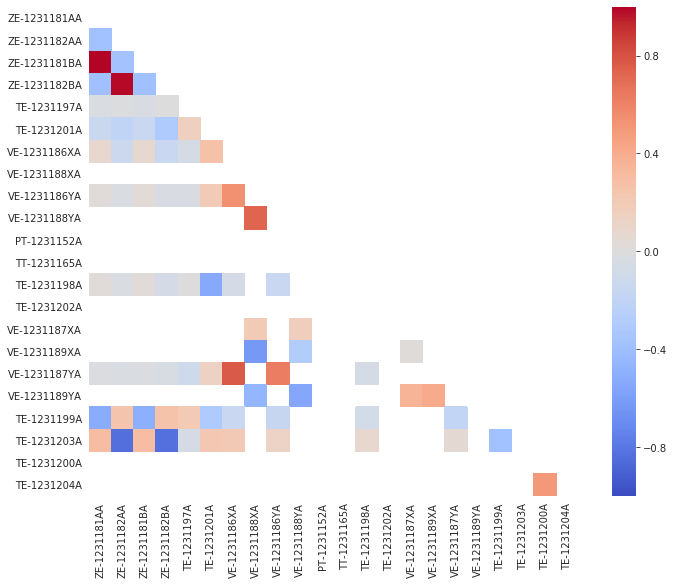

In [7]:
# Show correlation matrix
# sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.figure(figsize=(12, 9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', square=True)

---

## interpolate

- Please note that only method='linear' is supported for DataFrame/Series with a MultiIndex.
- methods types: {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’ ‘piecewise_polynomial’, ‘pchip’}

In [8]:
# Show interpolate linear
inter_linear = interpolate(df.iloc[:,0], method="linear")
inter_linear = inter_linear.rename(inter_linear.name+"_linear")
display(inter_linear)

data
2018-06-20 13:53:58    1332.000000
2018-06-20 13:54:04    1329.333333
2018-06-20 13:54:12    1326.666667
2018-06-20 13:54:13    1324.000000
2018-06-20 13:54:19    1322.333333
                          ...     
2018-06-20 15:12:28    1326.000000
2018-06-20 15:12:34    1326.000000
2018-06-20 15:12:42    1326.000000
2018-06-20 15:12:43    1326.000000
2018-06-20 15:12:49    1326.000000
Name: ZE-1231181AA_linear, Length: 1000, dtype: float64

In [9]:
# Show interpolate cubic
inter_cubic = interpolate(df.iloc[:,0], method="cubic")
inter_cubic = inter_cubic.rename(inter_cubic.name+"_cubic")
display(inter_cubic)

data
2018-06-20 13:53:58    1332.000000
2018-06-20 13:54:04    1329.575095
2018-06-20 13:54:12    1324.636189
2018-06-20 13:54:13    1324.000000
2018-06-20 13:54:19    1320.646792
                          ...     
2018-06-20 15:12:28    1326.000000
2018-06-20 15:12:34    1331.109345
2018-06-20 15:12:42    1327.675198
2018-06-20 15:12:43    1326.000000
2018-06-20 15:12:49            NaN
Name: ZE-1231181AA_cubic, Length: 1000, dtype: float64

In [10]:
# Show [0] column of time series with cubic and linear interpolate
wide_df = df.iloc[:,0].copy()
wide_df = pd.concat([wide_df, inter_linear, inter_cubic], axis=1)
display(wide_df)

,ZE-1231181AA,ZE-1231181AA_linear,ZE-1231181AA_cubic
data,,,
2018-06-20 13:53:58,1332.0,1332.000000,1332.000000
2018-06-20 13:54:04,NaN,1329.333333,1329.575095
2018-06-20 13:54:12,NaN,1326.666667,1324.636189
2018-06-20 13:54:13,1324.0,1324.000000,1324.000000
2018-06-20 13:54:19,NaN,1322.333333,1320.646792
2018-06-20 13:54:27,NaN,1320.666667,1318.884407
2018-06-20 13:54:28,1319.0,1319.000000,1319.000000
2018-06-20 13:54:42,NaN,1323.000000,1326.396553
2018-06-20 13:54:43,1327.0,1327.000000,1327.000000


/opt/anaconda3/envs/analytics-utils/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


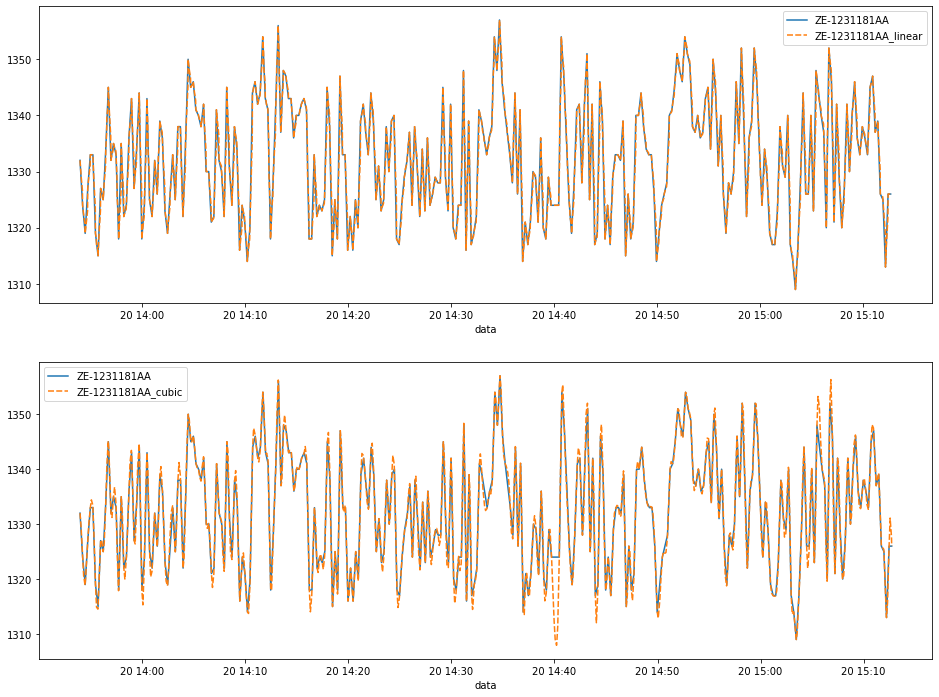

In [11]:
# Show plot [0] column of time series with cubic and linear interpolate
zero_df = df.iloc[:,0].copy()
linear_df = pd.concat([zero_df, inter_linear], axis=1)
cubic_df = pd.concat([zero_df, inter_cubic], axis=1)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.lineplot(data=linear_df, ax=ax1)
sns.lineplot(data=cubic_df, ax=ax2)

---

## roll (rolling window)

def roll(
    data_frame: pd.DataFrame,
    window: int,
    roll_type: str = "mean",
    headers: [str] = None,
) -> pd.DataFrame

- roll_type: {‘mean’, ‘var’, 'std'}

In [12]:
# Show moving average, std and var in the column zero
roll_df = cubic_df.iloc[:,1].copy()
m_roll = roll(roll_df, 24, roll_type="mean")
m_roll = m_roll.rename(m_roll.name+"_mean")
std_roll = roll(roll_df, 24, roll_type="std")
std_roll = std_roll.rename(std_roll.name+"_std")
var_roll = roll(roll_df, 24, roll_type="var")
var_roll = var_roll.rename(var_roll.name+"_var")
wide_rdf = pd.concat([roll_df, m_roll, std_roll, var_roll], axis=1)
display(wide_rdf)

,ZE-1231181AA_cubic,ZE-1231181AA_cubic_mean,ZE-1231181AA_cubic_std,ZE-1231181AA_cubic_var
data,,,,
2018-06-20 13:53:58,1332.000000,NaN,NaN,NaN
2018-06-20 13:54:04,1329.575095,NaN,NaN,NaN
2018-06-20 13:54:12,1324.636189,NaN,NaN,NaN
2018-06-20 13:54:13,1324.000000,NaN,NaN,NaN
2018-06-20 13:54:19,1320.646792,NaN,NaN,NaN
2018-06-20 13:54:27,1318.884407,NaN,NaN,NaN
2018-06-20 13:54:28,1319.000000,NaN,NaN,NaN
2018-06-20 13:54:42,1326.396553,NaN,NaN,NaN
2018-06-20 13:54:43,1327.000000,NaN,NaN,NaN


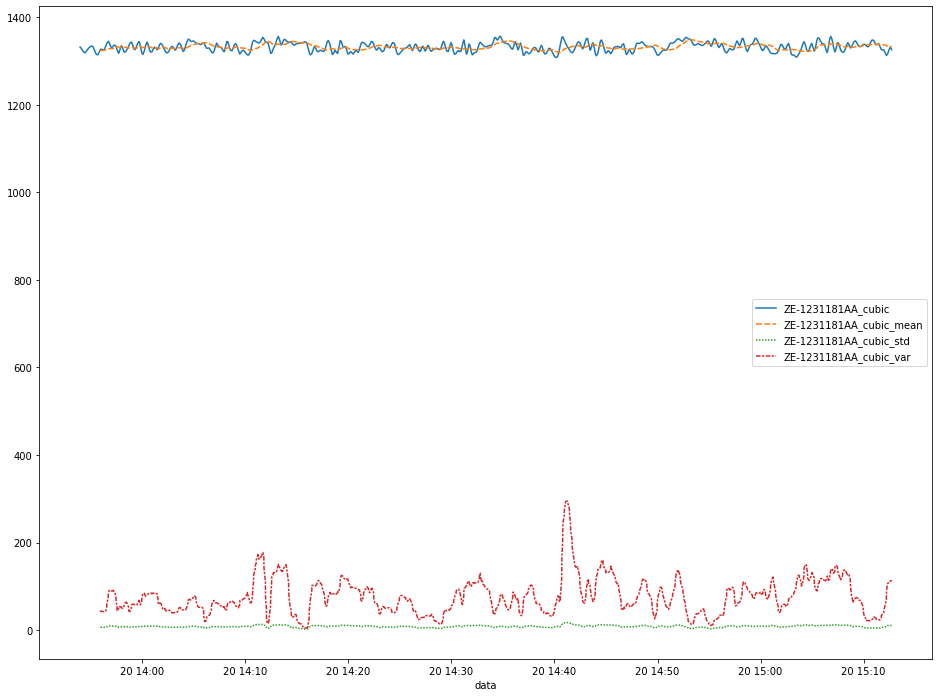

In [13]:
# Show graphic moving average, std and var in the column zero
fig = plt.figure(figsize=(16, 12))
ax = sns.lineplot(data=wide_rdf)

In [14]:
# Show Dickey-Fuller test
dftest(roll_df.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.854707e+00
p-value                        5.482026e-12
#Lags Used                     9.000000e+00
Number of Observations Used    9.890000e+02
Critical Value (1%)           -3.436979e+00
Critical Value (5%)           -2.864467e+00
Critical Value (10%)          -2.568328e+00
dtype: float64


## roll - method of stationary a time serie

In [15]:
# Show moving average, std and var in the column zero (stationary)
roll_df_stat = (roll_df - m_roll).copy()
m_roll_stat = roll(roll_df_stat, 24, roll_type="mean")
m_roll_stat = m_roll_stat.rename("stat_mean")
std_roll_stat = roll(roll_df_stat, 24, roll_type="std")
std_roll_stat = std_roll_stat.rename("stat_std")
var_roll_stat = roll(roll_df_stat, 24, roll_type="var")
var_roll_stat = var_roll_stat.rename("stat_var")
wide_rdf_stat = pd.concat([roll_df_stat, m_roll_stat, std_roll_stat, var_roll_stat], axis=1)
display(wide_rdf_stat)

,0,stat_mean,stat_std,stat_var
data,,,,
2018-06-20 13:53:58,NaN,NaN,NaN,NaN
2018-06-20 13:54:04,NaN,NaN,NaN,NaN
2018-06-20 13:54:12,NaN,NaN,NaN,NaN
2018-06-20 13:54:13,NaN,NaN,NaN,NaN
2018-06-20 13:54:19,NaN,NaN,NaN,NaN
2018-06-20 13:54:27,NaN,NaN,NaN,NaN
2018-06-20 13:54:28,NaN,NaN,NaN,NaN
2018-06-20 13:54:42,NaN,NaN,NaN,NaN
2018-06-20 13:54:43,NaN,NaN,NaN,NaN


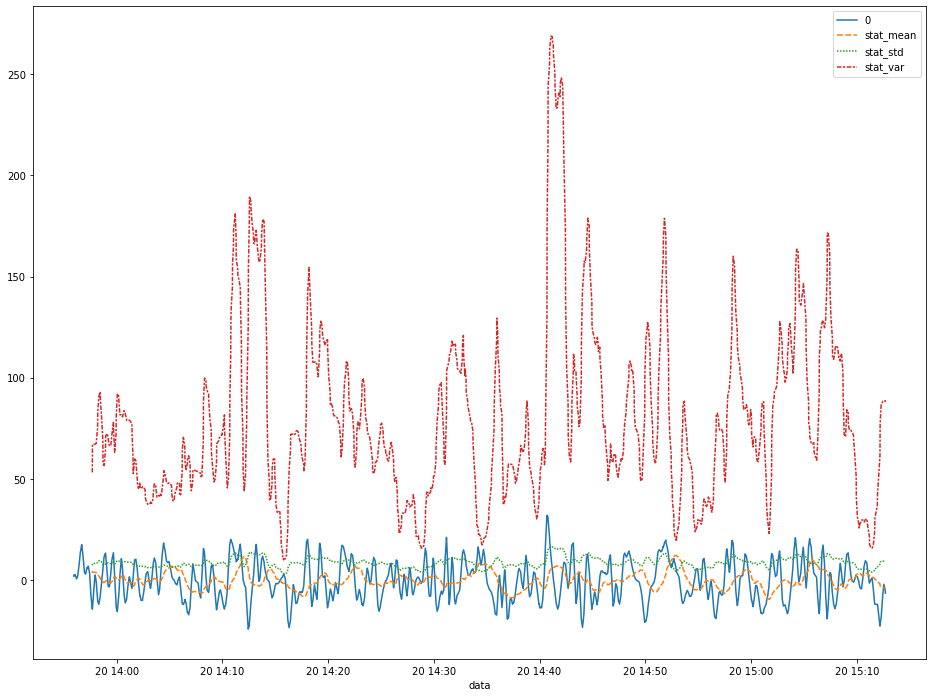

In [16]:
# Show graphic moving average, std and var in the column zero (stationary)
fig = plt.figure(figsize=(16, 12))
ax = sns.lineplot(data=wide_rdf_stat)

In [17]:
# Show Dickey-Fuller test (stationary)
dftest(roll_df_stat.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.800279e+00
p-value                        6.020790e-17
#Lags Used                     9.000000e+00
Number of Observations Used    9.660000e+02
Critical Value (1%)           -3.437138e+00
Critical Value (5%)           -2.864537e+00
Critical Value (10%)          -2.568366e+00
dtype: float64


---

## ewm (exponential weighted moving)

def ewm(
        data_frame: pd.DataFrame,
        com: float = None,
        span: float = None,
        halflife: float = None,
        alpha: float = None,
        ignore_na: bool = False,
        ewm_type: str = "mean",
        headers: [str] = None,
    ) -> pd.DataFrame

- com: α=1/(1+com), for com≥0
- span: α=2/(span+1), for span≥1
- halflife: α=1−exp(log(0.5)/halflife), for halflife>0
- alpha: 0<α≤1
- ewm_types: {‘mean’, ‘var’, 'std'}

In [18]:
# Show ewm average, std and var in the column zero
ewm_df = cubic_df.iloc[:,1].copy()
m_ewm = ewm(ewm_df, halflife=24, ewm_type="mean")
m_ewm = m_ewm.rename(m_ewm.name+"_mean")
std_ewm = ewm(ewm_df, halflife=24, ewm_type="std")
std_ewm = std_ewm.rename(std_ewm.name+"_std")
var_ewm = ewm(ewm_df, halflife=24, ewm_type="var")
var_ewm = var_ewm.rename(var_ewm.name+"_var")
wide_edf = pd.concat([ewm_df, m_ewm, std_ewm, var_ewm], axis=1)
display(wide_edf)

,ZE-1231181AA_cubic,ZE-1231181AA_cubic_mean,ZE-1231181AA_cubic_std,ZE-1231181AA_cubic_var
data,,,,
2018-06-20 13:53:58,1332.000000,1332.000000,NaN,NaN
2018-06-20 13:54:04,1329.575095,1330.770040,1.714667,2.940083
2018-06-20 13:54:12,1324.636189,1328.666096,3.764359,14.170398
2018-06-20 13:54:13,1324.000000,1327.448561,3.861366,14.910149
2018-06-20 13:54:19,1320.646792,1326.008518,4.546980,20.675028
2018-06-20 13:54:27,1318.884407,1324.733816,5.024903,25.249648
2018-06-20 13:54:28,1319.000000,1323.842051,5.076634,25.772216
2018-06-20 13:54:42,1326.396553,1324.194557,4.759369,22.651593
2018-06-20 13:54:43,1327.000000,1324.543475,4.526671,20.490749


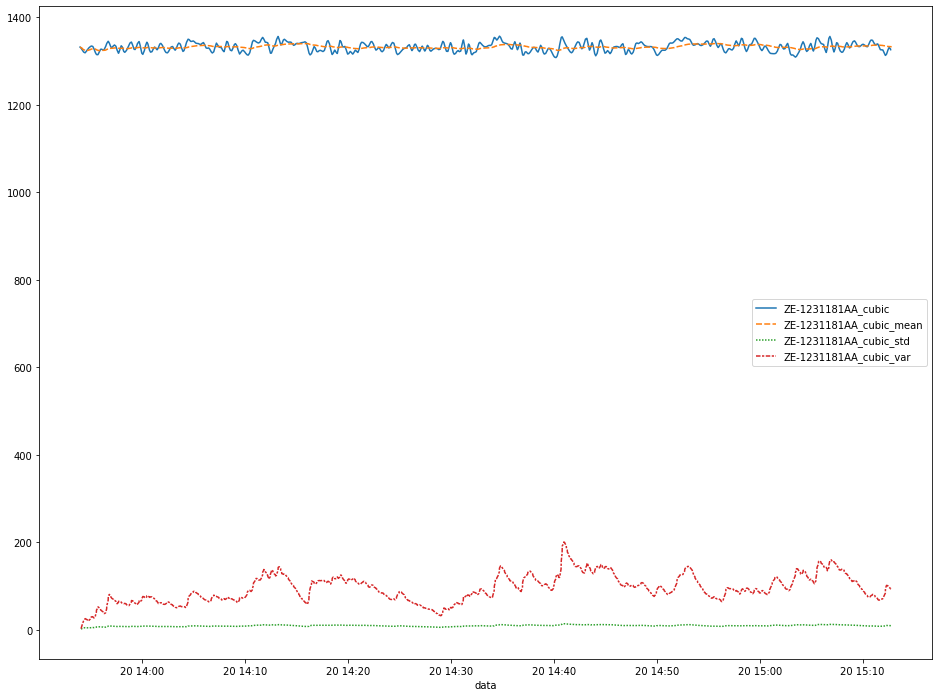

In [19]:
# Show graphic ewm average, std and var in the column zero
fig = plt.figure(figsize=(16, 12))
ax = sns.lineplot(data=wide_edf)

In [20]:
# Show Dickey-Fuller test (real value - mean value)
dftest(ewm_df.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.854707e+00
p-value                        5.482026e-12
#Lags Used                     9.000000e+00
Number of Observations Used    9.890000e+02
Critical Value (1%)           -3.436979e+00
Critical Value (5%)           -2.864467e+00
Critical Value (10%)          -2.568328e+00
dtype: float64


## ewm - method of stationary a time serie

In [21]:
# Show ewm average, std and var in the column zero (stationary)
ewm_df_stat = (ewm_df - m_ewm).copy() # or ewm_df - ewm_df.shift() for diferentiation
m_ewm_stat = ewm(ewm_df_stat, halflife=24, ewm_type="mean")
m_ewm_stat = m_ewm_stat.rename("stat_mean")
std_ewm_stat = ewm(ewm_df_stat, halflife=24, ewm_type="std")
std_ewm_stat = std_ewm_stat.rename("stat_std")
var_ewm_stat = ewm(ewm_df_stat, halflife=24, ewm_type="var")
var_ewm_stat = var_ewm_stat.rename("stat_var")
wide_edf_stat = pd.concat([ewm_df_stat, m_ewm_stat, std_ewm_stat, var_ewm_stat], axis=1)
display(wide_edf_stat)

,0,stat_mean,stat_std,stat_var
data,,,,
2018-06-20 13:53:58,0.000000,0.000000,NaN,NaN
2018-06-20 13:54:04,-1.194945,-0.606100,0.844954,0.713947
2018-06-20 13:54:12,-4.029907,-1.780484,2.077366,4.315451
2018-06-20 13:54:13,-3.448561,-2.215739,1.884392,3.550933
2018-06-20 13:54:19,-5.361725,-2.881795,2.165630,4.689955
2018-06-20 13:54:27,-5.849409,-3.412784,2.291366,5.250356
2018-06-20 13:54:28,-4.842051,-3.635074,2.150375,4.624111
2018-06-20 13:54:42,2.201996,-2.829594,2.922269,8.539654
2018-06-20 13:54:43,2.456525,-2.172149,3.284372,10.787097


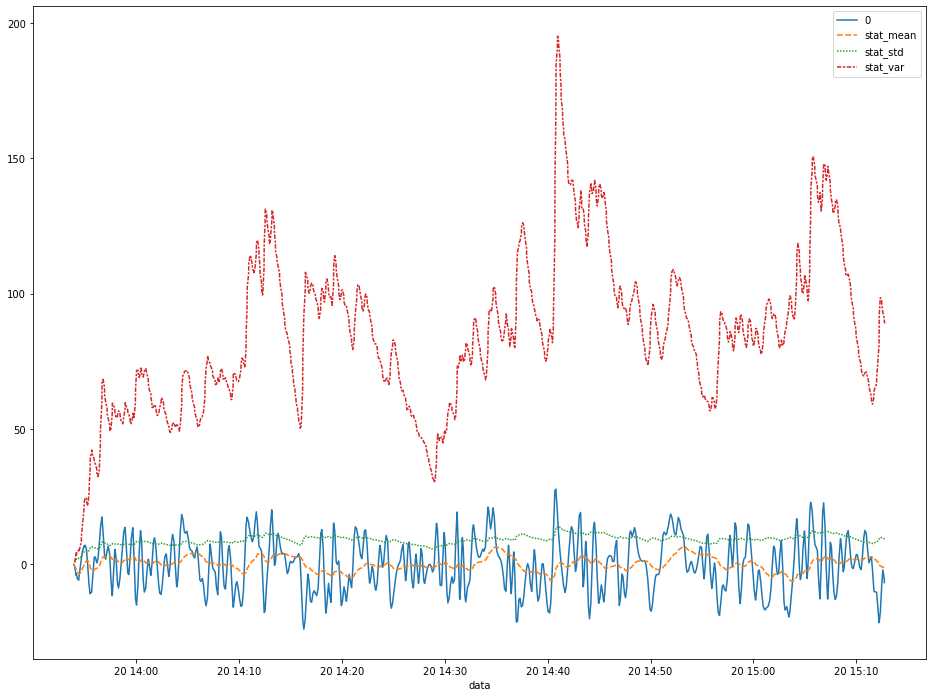

In [22]:
# Show graphic ewm average, std and var in the column zero (stationary)
fig = plt.figure(figsize=(16, 12))
ax = sns.lineplot(data=wide_edf_stat)

In [23]:
# Show Dickey-Fuller test (stationary)
dftest(ewm_df_stat.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.690314e+00
p-value                        4.057365e-14
#Lags Used                     9.000000e+00
Number of Observations Used    9.890000e+02
Critical Value (1%)           -3.436979e+00
Critical Value (5%)           -2.864467e+00
Critical Value (10%)          -2.568328e+00
dtype: float64


---

## decompose

def decompose(
    data_frame: pd.DataFrame,
    model: str = "additive",
    filt: [] = None,
    freq: int = None,
    two_sided: bool = True,
    extrapolate_trend: int = 0,
    lang: str = "pt",
    headers: [str] = None,
) -> pd.DataFrame

- model: {“additive”, “multiplicative”}

## decompose additive

In [24]:
# Show seasonal decompose (additive)
decompose_add = decompose(inter_cubic.dropna(), model='additive', freq=24)

observed_add = decompose_add.iloc[0,0].rename("observed")
seasonal_add = decompose_add.iloc[0,1].rename("seasonal")
trend_add = decompose_add.iloc[0,2].rename("trend")
resid_add = decompose_add.iloc[0,3].rename("resid")

wide_df_add = pd.concat([observed_add, seasonal_add, trend_add, resid_add], axis=1)
wide_df_add

,observed,seasonal,trend,resid
data,,,,
2018-06-20 13:53:58,1332.000000,0.369279,NaN,NaN
2018-06-20 13:54:04,1329.575095,-0.157793,NaN,NaN
2018-06-20 13:54:12,1324.636189,-0.159665,NaN,NaN
2018-06-20 13:54:13,1324.000000,0.048917,NaN,NaN
2018-06-20 13:54:19,1320.646792,0.302153,NaN,NaN
2018-06-20 13:54:27,1318.884407,0.203792,NaN,NaN
2018-06-20 13:54:28,1319.000000,0.852904,NaN,NaN
2018-06-20 13:54:42,1326.396553,0.846279,NaN,NaN
2018-06-20 13:54:43,1327.000000,0.897517,NaN,NaN


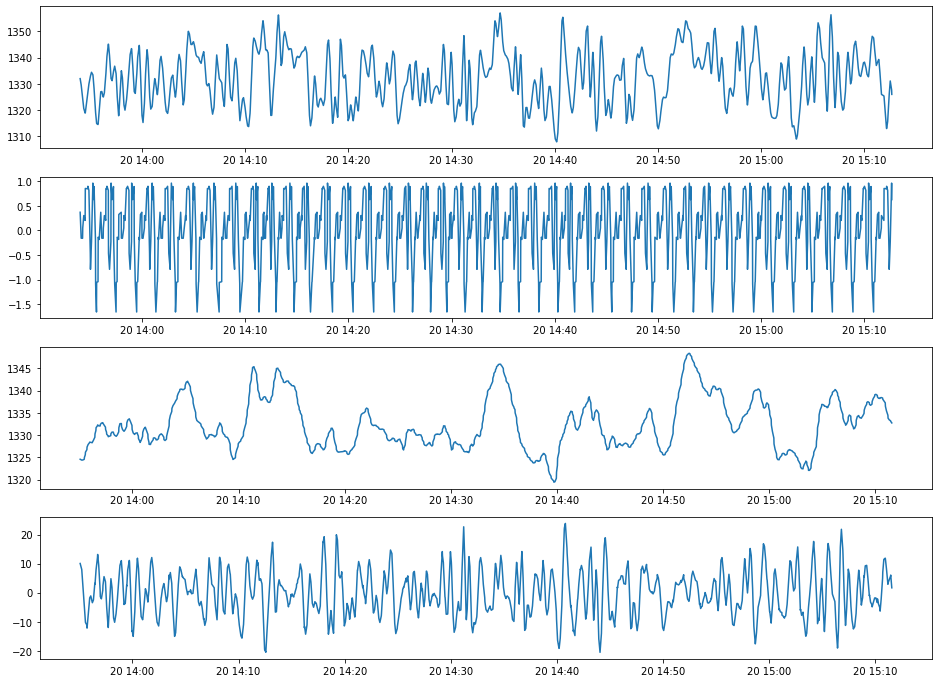

In [25]:
# Show graphic seasonal decompose (additive)
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.lineplot(data=observed_add, ax=ax1)
sns.lineplot(data=seasonal_add, ax=ax2)
sns.lineplot(data=trend_add, ax=ax3)
sns.lineplot(data=resid_add, ax=ax4)

## decompose multiplicative

In [26]:
# Show seasonal decompose (multiplicative)
decompose_mult = decompose(inter_cubic.dropna(), model='multiplicative', freq=24)

observed_mult = decompose_mult.iloc[0,0].rename('observed')
seasonal_mult = decompose_mult.iloc[0,1].rename('seasonal')
trend_mult = decompose_mult.iloc[0,2].rename('tend')
resid_mult = decompose_mult.iloc[0,3].rename('resid')

wide_df_mult = pd.concat([observed_mult, seasonal_mult, trend_mult, resid_mult], axis=1)
wide_df_mult

,observed,seasonal,tend,resid
data,,,,
2018-06-20 13:53:58,1332.000000,1.000272,NaN,NaN
2018-06-20 13:54:04,1329.575095,0.999879,NaN,NaN
2018-06-20 13:54:12,1324.636189,0.999882,NaN,NaN
2018-06-20 13:54:13,1324.000000,1.000042,NaN,NaN
2018-06-20 13:54:19,1320.646792,1.000232,NaN,NaN
2018-06-20 13:54:27,1318.884407,1.000158,NaN,NaN
2018-06-20 13:54:28,1319.000000,1.000643,NaN,NaN
2018-06-20 13:54:42,1326.396553,1.000638,NaN,NaN
2018-06-20 13:54:43,1327.000000,1.000676,NaN,NaN


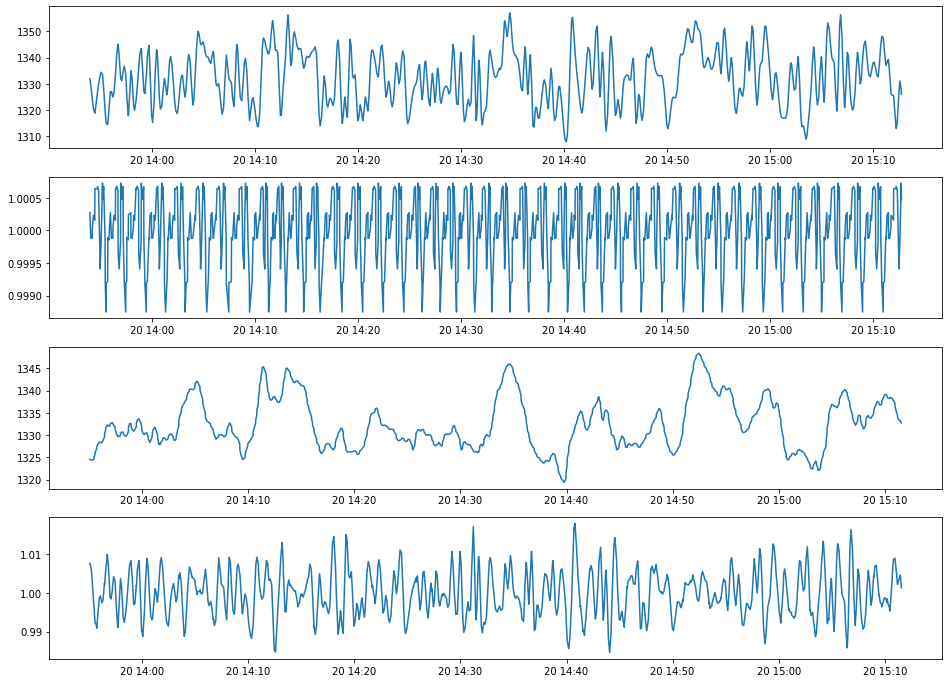

In [27]:
# Show graphic seasonal decompose (additive)
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.lineplot(data=observed_mult, ax=ax1)
sns.lineplot(data=seasonal_mult, ax=ax2)
sns.lineplot(data=trend_mult, ax=ax3)
sns.lineplot(data=resid_mult, ax=ax4)

---

## autocorrelation

In [37]:
auto = autocorrelation(observed_mult, fft=False)
auto

,acf
0,1.000000
1,0.898256
2,0.716999
3,0.503542
4,0.342621
5,0.251050
6,0.211738
7,0.207574
8,0.202514
9,0.181370


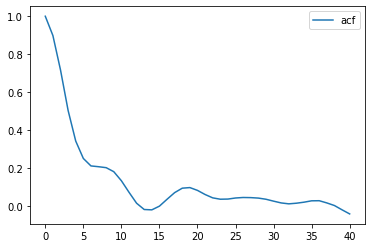

In [38]:
sns.lineplot(data=auto)

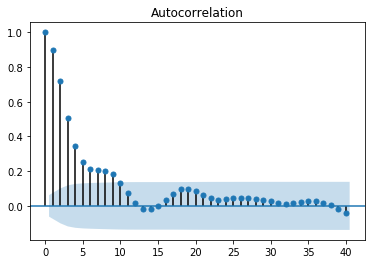

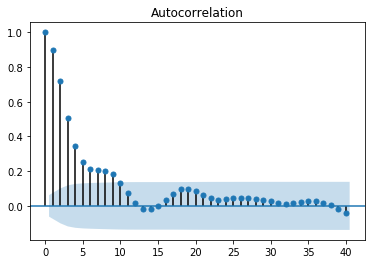

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(observed_mult, lags=40)